### EDA And Feature Engineering- Zomato Dataset


In [1]:
#Import Lib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  

#Converting JSON File into csv is important - learn this from online

In [2]:
df = pd.read_csv("/Users/akb/Desktop/DS/BIA/vscode workspace/Kaggle/EDA:Preprocessing/KN_YT/Zomatodataset/zomato.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [3]:
#We might encouter the above error (UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte) at times so we need to use ecoding

df = pd.read_csv("/Users/akb/Desktop/DS/BIA/vscode workspace/Kaggle/EDA:Preprocessing/KN_YT/Zomatodataset/zomato.csv", encoding="latin-1")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.columns

#Seeing all the columns we have

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
## In data analysis things we do 
    #1. Check for missing values 
    #2. Explore about Numerical varabiles 
    #3. Explore about Categorical varabiles 
    #4. Finding Relationship between Features 

In [11]:
#Checking for missing values 

df.isnull().sum() #We have 9 missing values in Cuisines 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
#Checking for missing values  - alternative way to see it

[features for features in df.columns if df[features].isnull().sum()>0]


['Cuisines']

<Axes: >

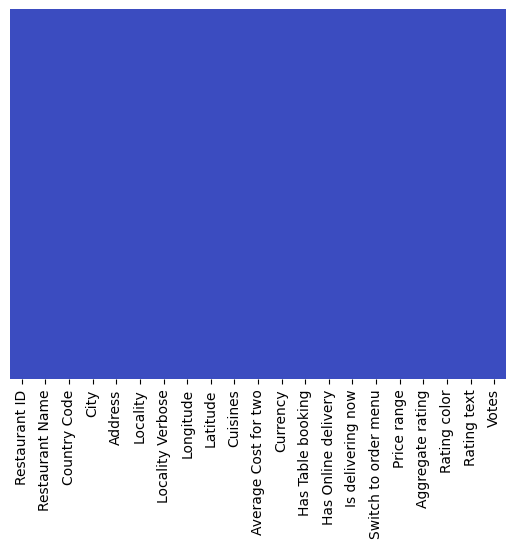

In [18]:
#Heatmap to see the missing values 

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm') #Not able to see because the quantity of missing values is very less

In [19]:
#Loading country code dataset

df_country = pd.read_excel("/Users/akb/Desktop/DS/BIA/vscode workspace/Kaggle/EDA:Preprocessing/KN_YT/Zomatodataset/Country-Code.xlsx")

In [20]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [24]:
print(df_country.columns)

Index(['Country Code', 'Country'], dtype='object')


In [25]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [27]:
#How do we combine the two dataframe ? (Based on the country code)

final_df = pd.merge(df,df_country, on="Country Code", how='left')

In [28]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [30]:
#To check the Data Types 

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [31]:
#Exploring the Dataset 

final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [33]:
#Find the number of records w.r.t country 

final_df["Country"].value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [35]:
final_df["Country"].value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [37]:
final_df["Country"].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [41]:
#Storing the country name for plotting 

country_names = final_df["Country"].value_counts().index

In [44]:
#Getting the value count for each country 
country_values = final_df["Country"].value_counts().values

([<matplotlib.patches.Wedge at 0x329361f50>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.47713249041582306, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

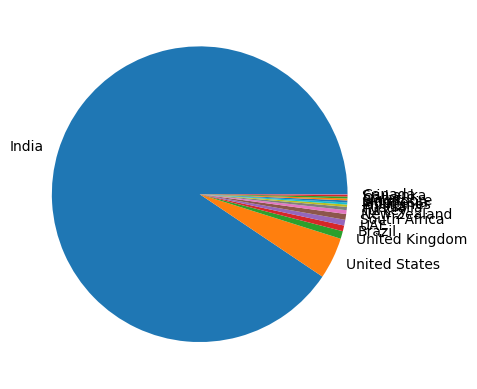

In [45]:
#Plotting a pie chart w.r.t country to see see which country has max orders

plt.pie(country_values, labels=country_names)

([<matplotlib.patches.Wedge at 0x32eed6fd0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

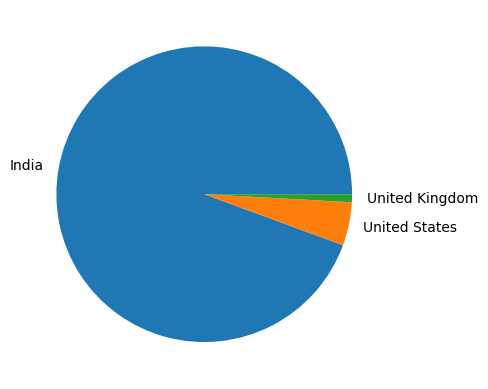

In [48]:
#The above pie chart is not properly visible becuase of too many datapoints (spread is very less for some country)

#Plotting top three countries using [:3]

plt.pie(country_values[:3], labels=country_names[:3])

([<matplotlib.patches.Wedge at 0x32efb6090>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

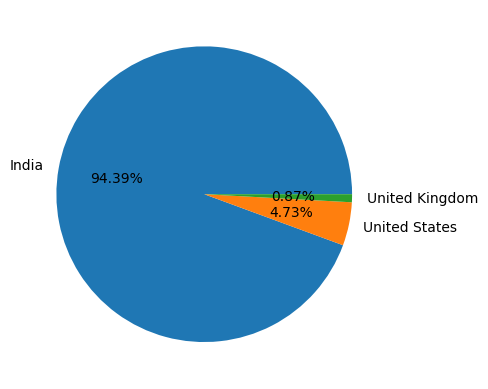

In [51]:
#To show the percentage in the pie chart 

plt.pie(country_values[:3], labels=country_names[:3], autopct="%1.2f%%")

## Observation from the above diagram 
    #1. Zomato max order/transactions are from India 
    #2. Then from US and UK

In [52]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [53]:
#Using groupby - based on 'Aggregate rating', 'Rating color', 'Rating text'

final_df.groupby(["Aggregate rating", "Rating color", "Rating text"])

In [56]:
final_df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns= {0:"Rating Count"})

#Here we made a column called Rating Count 
#With .size we get individual count of rating 

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [57]:
ratings = final_df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns= {0:"Rating Count"})


## Observations based on the above - 
#1. When the rating is above 4.5 to 4.9 - the Rating is Excellent 
#2. When the rating is above 4.0 to 4.4 - the Rating is Very Good 
#3. When the rating is above 3.5 to 3.9 - the Rating is Good 
#4. When the rating is above 2.5 to 3.4 - the Rating is Average
#5. When the rating is above 1.8 to 2.4 - the Rating is Average
#6. When no one has rated - it is show 0.0. 


In [59]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

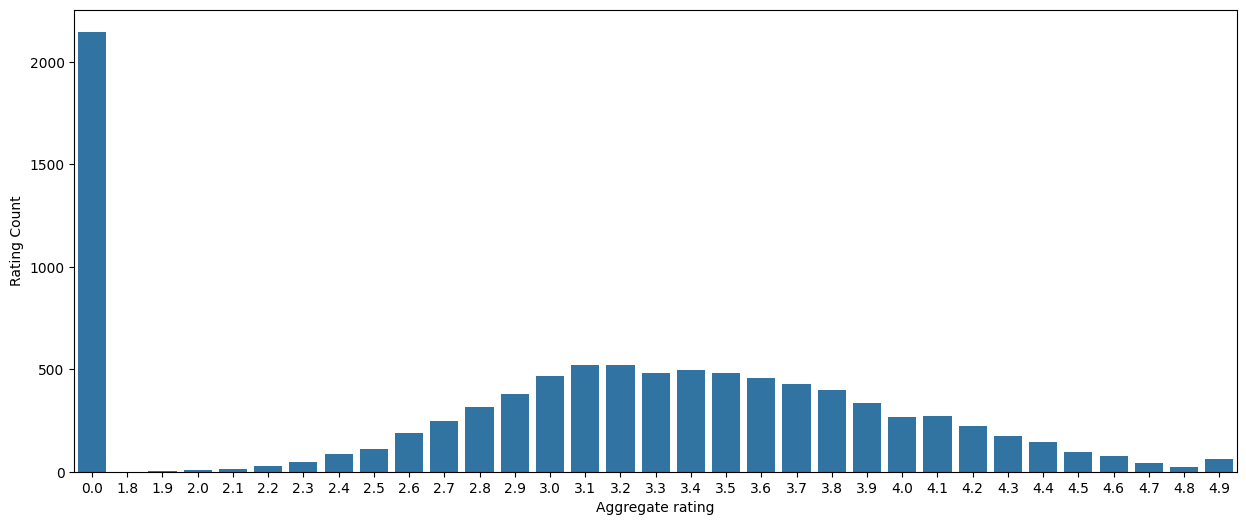

In [67]:
#Here we plotted a bargraph 
plt.figure(figsize=(15,6))
sns.barplot(x="Aggregate rating", y ="Rating Count", data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

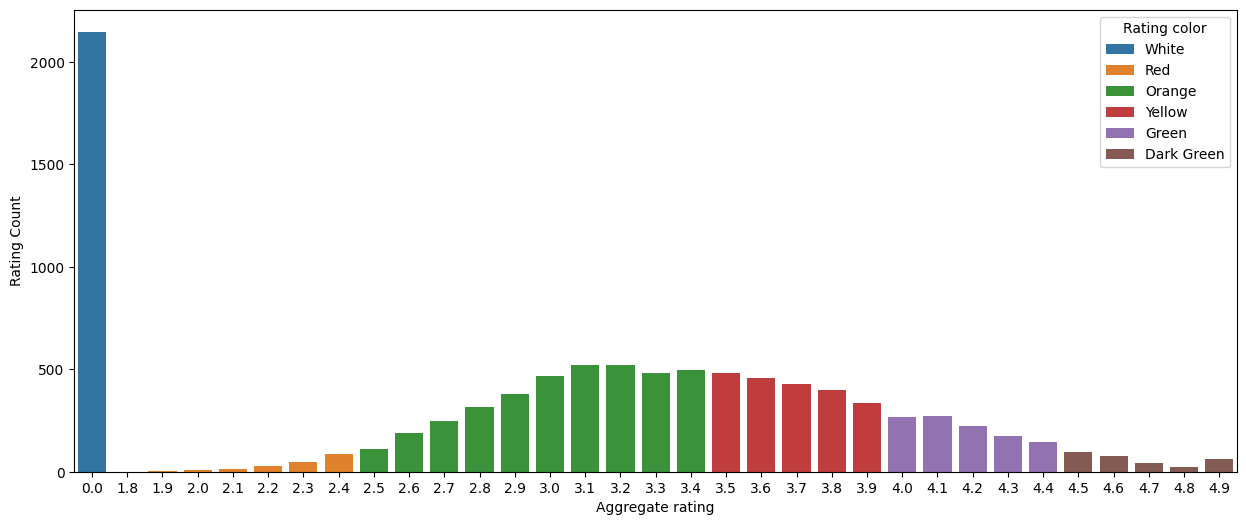

In [68]:
#If we want to colour each bar based on the Rating color given then we can do the following 

plt.figure(figsize=(15,6))
sns.barplot(x="Aggregate rating", y ="Rating Count", data=ratings, hue="Rating color")

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

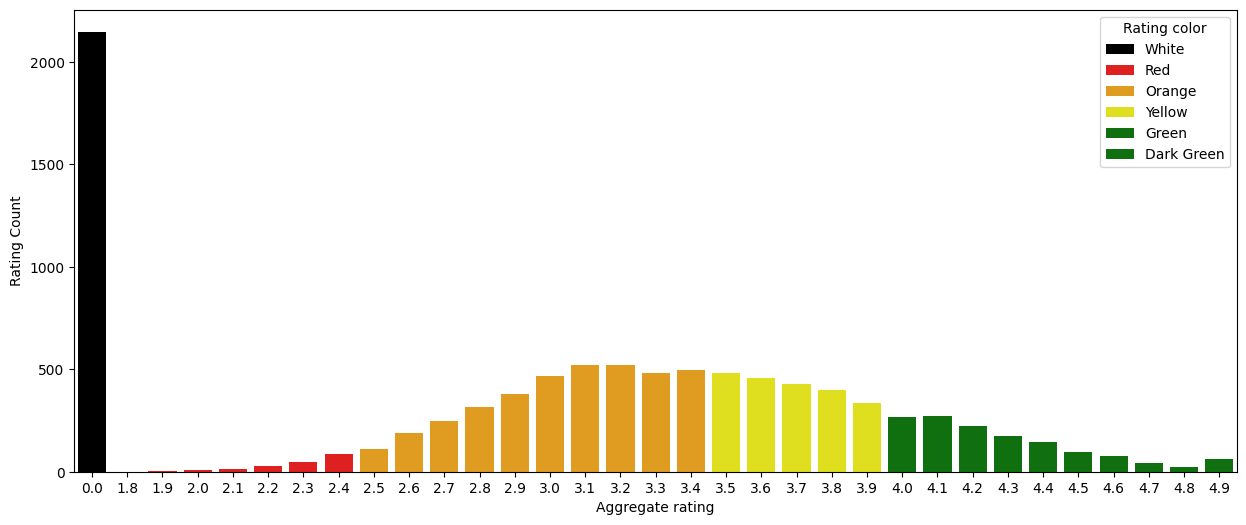

In [71]:
#If you noitce the colour is inconsistent with the Rating Colour so we need to map it - to map the colour with Rating colour we can do the following 

#Use Pallete  

plt.figure(figsize=(15,6))
sns.barplot(x="Aggregate rating", y ="Rating Count", hue="Rating color", data=ratings,palette=["black","red","orange","yellow","green","green"])

## Observations from the above bar graph 
#1. Count of not rated is very high 
#2. Max rating count of rating is between 2.5 to 3.4 


/var/folders/d2/_dvq3fcj7g7gcy615y4n71g40000gn/T/ipykernel_3727/3830024308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color" , data = ratings,palette=["black","red","orange","yellow","green","green"] )


<Axes: xlabel='Rating color', ylabel='count'>

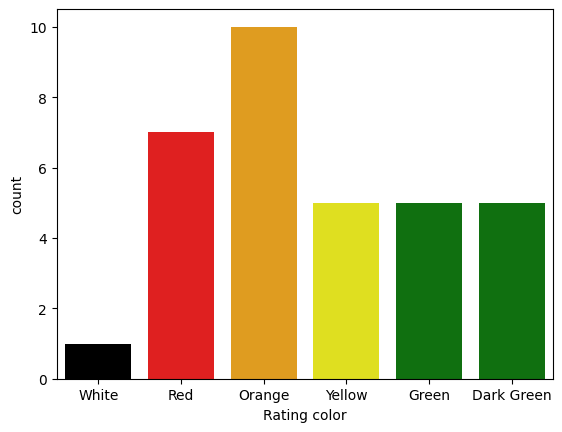

In [74]:
#Using countplot w.r.t categorical varables 

sns.countplot(x="Rating color" , data = ratings,palette=["black","red","orange","yellow","green","green"] )

#The below count shows the frequency of each colour 

In [79]:
#Find the countries name that has given 0 ratings 

final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [80]:
final_df["Rating color"] == "White"

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Rating color, Length: 9551, dtype: bool

In [83]:
final_df[final_df["Rating color"] == "White"].head(2) 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,No,No,No,No,1,0.0,White,Not rated,2,Brazil
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,No,No,No,No,3,0.0,White,Not rated,1,Brazil


In [96]:
final_df[final_df["Rating color"] == "White"].groupby(["Aggregate rating", "Country"]).size()

Aggregate rating  Country       
0.0               Brazil               5
                  India             2139
                  United Kingdom       1
                  United States        3
dtype: int64

In [94]:
final_df[final_df["Rating color"] == "White"].groupby(["Country"]).size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Observations 
#1. Max number of  0 ratings is by Indian customers 

In [116]:
#Find out which currency is used by which country ?

final_df[["Country", "Currency"]].value_counts().reset_index()

,Country,Currency,0
0,India,Indian Rupees(Rs.),8652
1,United States,Dollar($),434
2,United Kingdom,Pounds(£),80
3,Brazil,Brazilian Real(R$),60
4,South Africa,Rand(R),60
5,UAE,Emirati Diram(AED),60
6,New Zealand,NewZealand($),40
7,Turkey,Turkish Lira(TL),34
8,Australia,Dollar($),24
9,Phillipines,Botswana Pula(P),22


In [123]:
# or we can do this way using group by
final_df[["Country", "Currency"]].groupby(["Country", "Currency"]).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [132]:
#Which countries do have online deliveries options 

final_df[(final_df["Has Online delivery"] == "Yes")].groupby(["Country"]).size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [136]:
# or we can do it like this too
final_df[(final_df["Has Online delivery"] == "Yes")]["Country"].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [167]:
#All the country that has and has no  delivery option 

final_df[["Has Online delivery", "Country"]].groupby(["Has Online delivery","Country"]).size().reset_index()
#India is repeating because in some regions because Online deliveries are no avaliable 

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


## Observations 
#1. Online delivery is avaliable in both India and UAE

In [169]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [190]:
value_count__cities = final_df["City"].value_counts().values
print(value_count__cities)

name_cities = final_df["City"].value_counts().index
print(name_cities)

[5473 1118 1080  251   25   21   21   21   21   21   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   18   18   16   14   11    6    4
    4    3    3    2    2    2    2    2    2    2    2    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]
Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vin

([<matplotlib.patches.Wedge at 0x33d2630d0>,
 [Text(-0.2501618674207579, 1.0711764747643402, 'New Delhi'),
  Text(-0.745121915719338, -0.8091930120278745, 'Gurgaon'),
  Text(-0.023335860702208486, -1.0997524437823665, 'Noida'),
  Text(0.4451062250173843, -1.0059226851258372, 'Faridabad'),
  Text(0.5344697170236794, -0.9614271275477035, 'Ghaziabad'),
  Text(0.5489550432957175, -0.9532304865247423, 'Bhubaneshwar'),
  Text(0.5620711022307091, -0.9455559613461045, 'Amritsar'),
  Text(0.5750798895062447, -0.9377009761568373, 'Ahmedabad'),
  Text(0.5879789223862543, -0.9296670300863097, 'Lucknow'),
  Text(0.6007657390813725, -0.9214556564186973, 'Guwahati'),
  Text(0.6131375319471077, -0.9132701500201403, 'Ludhiana'),
  Text(0.625100125752387, -0.9051242084843107, 'Rest of Hawaii'),
  Text(0.6369545100691332, -0.8968215832051494, 'Kochi'),
  Text(0.6486986328151094, -0.888363711428944, 'Kolkata'),
  Text(0.6603304609951781, -0.8797520572763077, 'Pocatello'),
  Text(0.6718479810532302, -0.870

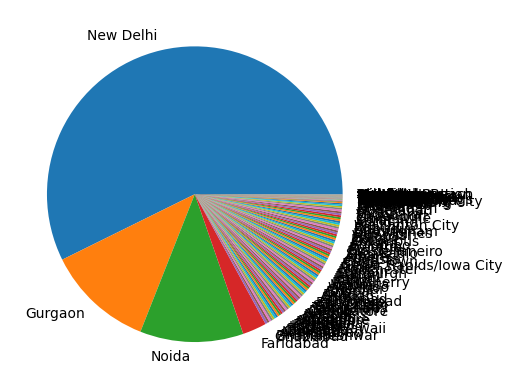

In [191]:
#Creating a pie chart for cities distributuion 
plt.pie(value_count__cities,labels=name_cities)

([<matplotlib.patches.Wedge at 0x33dd4f5d0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')])

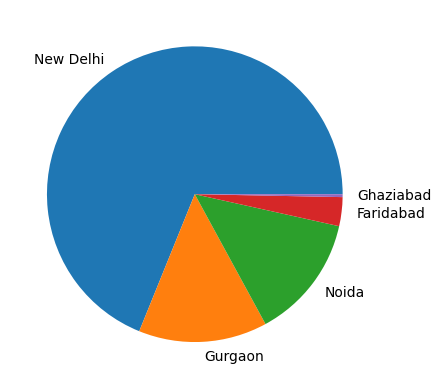

In [195]:
#Viewing the top 5 cities that has higher zomato orders
plt.pie(value_count__cities[:5], labels=name_cities[:5])

([<matplotlib.patches.Wedge at 0x33dd4fc10>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

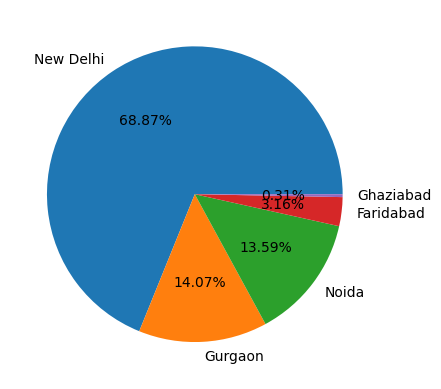

In [196]:
#Viewing the top 5 cities that has higher zomato orders and displaying their respective percentage 

plt.pie(value_count__cities[:5], labels= name_cities[:5], autopct="%1.2f%%")


([<matplotlib.patches.Wedge at 0x33fdb2810>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664212, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.50514632158168

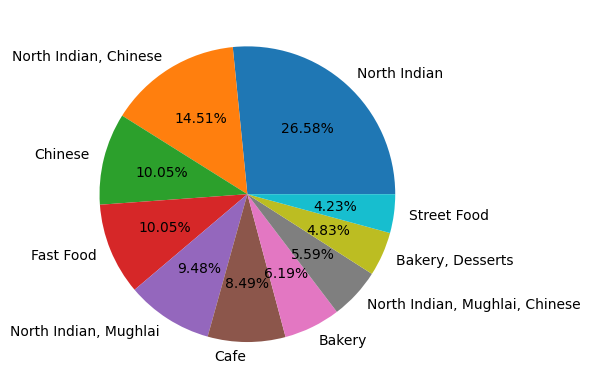

In [ ]:
# Viewing the top 10 Cusines 
cusines_values = final_df["Cuisines"].value_counts().values
cusines_names = final_df["Cuisines"].value_counts().index
plt.pie(cusines_values[:10], labels=cusines_names[:10], autopct="%1.2f%%")